# Load Libraries

In [201]:
import numpy as np
import pandas as pd
import quandl
import math, datetime
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Load Data

In [202]:
airbnb_train = pd.read_csv(r'C:\Users\ranih\OneDrive\Desktop\Python For Real\Github\Data\Kaggle\AirBnb\airbnb_train.csv')
airbnb_test = pd.read_csv(r'C:\Users\ranih\OneDrive\Desktop\Python For Real\Github\Data\Kaggle\AirBnb\airbnb_test.csv')

In [203]:
print("train rows:", airbnb_train.shape[0])
print("train columns:", airbnb_train.shape[1])

train rows: 74111
train columns: 29


In [204]:
print("test rows:", airbnb_test.shape[0])
print("test columns:", airbnb_test.shape[1])

test rows: 25458
test columns: 28


# Data Exploration

In [205]:
# check for null values
airbnb_train.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [206]:
# check for null values
airbnb_test.isnull().sum()

id                           0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                   79
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                 14
first_review              5436
host_has_profile_pic        55
host_identity_verified      55
host_response_rate        6306
host_since                  55
instant_bookable             0
last_review               5425
latitude                     0
longitude                    0
name                         5
neighbourhood             2465
number_of_reviews            0
review_scores_rating      5717
thumbnail_url             2859
zipcode                    321
bedrooms                    28
beds                        46
dtype: int64

In [207]:
"""both the train/test dataframes have missing values that need to be either filled/dropped."""

'both the train/test dataframes have missing values that need to be either filled/dropped.'

In [208]:
airbnb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [209]:
airbnb_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25458 entries, 0 to 25457
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      25458 non-null  int64  
 1   property_type           25458 non-null  object 
 2   room_type               25458 non-null  object 
 3   amenities               25458 non-null  object 
 4   accommodates            25458 non-null  int64  
 5   bathrooms               25379 non-null  float64
 6   bed_type                25458 non-null  object 
 7   cancellation_policy     25458 non-null  object 
 8   cleaning_fee            25458 non-null  bool   
 9   city                    25458 non-null  object 
 10  description             25444 non-null  object 
 11  first_review            20022 non-null  object 
 12  host_has_profile_pic    25403 non-null  object 
 13  host_identity_verified  25403 non-null  object 
 14  host_response_rate      19152 non-null

In [210]:
"""Both dataframes contain a mix of int64, float64, and object data types.There are a few data type conversion and cleaning the must be ran.""".replace("\n"," ")

'Both dataframes contain a mix of int64, float64, and object data types.There are a few data type conversion and cleaning the must be ran.'

# Data Cleaning

### Numeric Data Imputation

### Train Data

In [211]:
# creating a dataframe of only numeric values in order to impute missing values with the mean of the given column
airbnb_train_int = airbnb_train.select_dtypes(exclude=['object'])
airbnb_train_int.drop('cleaning_fee', axis = 1, inplace=True)

C:\Users\ranih\anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [286]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy="median")
mean_imputer.fit(airbnb_train_int)
airbnb_train_fill = mean_imputer.transform(airbnb_train_int)
airbnb_train_fill = pd.DataFrame(airbnb_train_fill, columns=['id','log_price', 'accommodates', 'bathrooms', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds'])
airbnb_train_fill.head()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,6901257.0,5.010635,3.0,1.0,40.696524,-73.991617,2.0,100.0,1.0,1.0
1,6304928.0,5.129899,7.0,1.0,40.766115,-73.989040,6.0,93.0,3.0,3.0
2,7919400.0,4.976734,5.0,1.0,40.808110,-73.943756,10.0,92.0,1.0,3.0
3,13418779.0,6.620073,4.0,1.0,37.772004,-122.431619,0.0,96.0,2.0,2.0
4,3808709.0,4.744932,2.0,1.0,38.925627,-77.034596,4.0,40.0,0.0,1.0


In [287]:
# check for missing values
airbnb_train_fill.isnull().sum()

id                      0
log_price               0
accommodates            0
bathrooms               0
latitude                0
longitude               0
number_of_reviews       0
review_scores_rating    0
bedrooms                0
beds                    0
dtype: int64

### Test Data

In [288]:
# creating a dataframe of only numeric values in order to impute missing values with the mean of the given column
airbnb_test_int = airbnb_test.select_dtypes(exclude=['object'])
airbnb_test_int.drop('cleaning_fee', axis = 1, inplace=True)

C:\Users\ranih\anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [289]:
mean_imputer_2 = SimpleImputer(missing_values=np.nan, strategy="median")
mean_imputer_2.fit(airbnb_test_int)
airbnb_test_fill = mean_imputer_2.transform(airbnb_test_int)
airbnb_test_fill = pd.DataFrame(airbnb_test_fill, columns=['id','accommodates', 'bathrooms', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds'])
airbnb_test_fill.head()

,id,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,3895911.0,2.0,1.0,34.028372,-118.494449,6.0,97.0,1.0,1.0
1,9710289.0,3.0,1.0,40.720380,-73.942329,2.0,80.0,1.0,1.0
2,9051635.0,1.0,1.0,37.785434,-122.470284,2.0,100.0,1.0,1.0
3,708374.0,1.0,1.0,33.976026,-118.463471,7.0,94.0,0.0,1.0
4,626296.0,2.0,1.0,40.735573,-74.005996,0.0,96.0,1.0,1.0


In [290]:
# check for missing values
airbnb_test_fill.isnull().sum()

id                      0
accommodates            0
bathrooms               0
latitude                0
longitude               0
number_of_reviews       0
review_scores_rating    0
bedrooms                0
beds                    0
dtype: int64

In [291]:
"""Numeric features for both dataframes have been filled with the median of the respective columns"""

'Numeric features for both dataframes have been filled with the median of the respective columns'

# Boolean Features

### Train

In [292]:
airbnb_train_bool = airbnb_train[['cleaning_fee', 'host_has_profile_pic', 'host_identity_verified','instant_bookable']]
airbnb_train_bool.head()

,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,True,t,t,f
1,True,t,f,t
2,True,t,t,t
3,True,t,t,f
4,True,t,t,t


In [293]:
airbnb_train_bool.loc[airbnb_train_bool['host_has_profile_pic'] == 't', 'host_has_profile_pic'] = 1
airbnb_train_bool.loc[airbnb_train_bool['host_has_profile_pic'] == 'f', 'host_has_profile_pic'] = 0
airbnb_train_bool.loc[airbnb_train_bool['host_identity_verified'] == 't', 'host_identity_verified'] = 1
airbnb_train_bool.loc[airbnb_train_bool['host_identity_verified'] == 'f', 'host_identity_verified'] = 0
airbnb_train_bool.loc[airbnb_train_bool['instant_bookable'] == 't', 'instant_bookable'] = 1
airbnb_train_bool.loc[airbnb_train_bool['instant_bookable'] == 'f', 'instant_bookable'] = 0

C:\Users\ranih\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [294]:
airbnb_train_bool.head()

,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,True,1,1,0
1,True,1,0,1
2,True,1,1,1
3,True,1,1,0
4,True,1,1,1


In [295]:
airbnb_train_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   cleaning_fee            74111 non-null  bool  
 1   host_has_profile_pic    73923 non-null  object
 2   host_identity_verified  73923 non-null  object
 3   instant_bookable        74111 non-null  object
dtypes: bool(1), object(3)
memory usage: 1.8+ MB


In [296]:
# converting to boolean
airbnb_train_bool['host_has_profile_pic'] = airbnb_train_bool.host_has_profile_pic == 1
airbnb_train_bool['host_identity_verified'] = airbnb_train_bool.host_identity_verified == 1
airbnb_train_bool['instant_bookable'] = airbnb_train_bool.host_identity_verified == 1

C:\Users\ranih\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ranih\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ranih\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [297]:
airbnb_train_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   cleaning_fee            74111 non-null  bool 
 1   host_has_profile_pic    74111 non-null  bool 
 2   host_identity_verified  74111 non-null  bool 
 3   instant_bookable        74111 non-null  bool 
dtypes: bool(4)
memory usage: 289.6 KB


In [298]:
airbnb_train_bool.head()

,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,True,True,True,True
1,True,True,False,False
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True


In [299]:
airbnb_train_bool['cleaning_fee'] = airbnb_train_bool['cleaning_fee'].astype(int)
airbnb_train_bool['host_has_profile_pic'] = airbnb_train_bool['host_has_profile_pic'].astype(int)
airbnb_train_bool['host_identity_verified'] = airbnb_train_bool['host_identity_verified'].astype(int)
airbnb_train_bool['instant_bookable'] = airbnb_train_bool['instant_bookable'].astype(int)

C:\Users\ranih\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ranih\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ranih\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [300]:
airbnb_train_bool.head()

,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,1,1,1,1
1,1,1,0,0
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


### Test

In [301]:
airbnb_test_bool = airbnb_test[['cleaning_fee', 'host_has_profile_pic', 'host_identity_verified','instant_bookable']]
airbnb_test_bool.head()

,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,True,t,f,f
1,True,t,t,f
2,True,t,t,f
3,True,t,t,f
4,True,t,t,f


In [302]:
airbnb_test_bool.loc[airbnb_test_bool['host_has_profile_pic'] == 't', 'host_has_profile_pic'] = 1
airbnb_test_bool.loc[airbnb_test_bool['host_has_profile_pic'] == 'f', 'host_has_profile_pic'] = 0
airbnb_test_bool.loc[airbnb_test_bool['host_identity_verified'] == 't', 'host_identity_verified'] = 1
airbnb_test_bool.loc[airbnb_test_bool['host_identity_verified'] == 'f', 'host_identity_verified'] = 0
airbnb_test_bool.loc[airbnb_test_bool['instant_bookable'] == 't', 'instant_bookable'] = 1
airbnb_test_bool.loc[airbnb_test_bool['instant_bookable'] == 'f', 'instant_bookable'] = 0

C:\Users\ranih\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [303]:
airbnb_test_bool.head()

,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,True,1,0,0
1,True,1,1,0
2,True,1,1,0
3,True,1,1,0
4,True,1,1,0


In [304]:
airbnb_test_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25458 entries, 0 to 25457
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   cleaning_fee            25458 non-null  bool  
 1   host_has_profile_pic    25403 non-null  object
 2   host_identity_verified  25403 non-null  object
 3   instant_bookable        25458 non-null  object
dtypes: bool(1), object(3)
memory usage: 621.7+ KB


In [305]:
# converting to boolean
airbnb_test_bool['host_has_profile_pic'] = airbnb_test_bool.host_has_profile_pic == 1
airbnb_test_bool['host_identity_verified'] = airbnb_test_bool.host_identity_verified == 1
airbnb_test_bool['instant_bookable'] = airbnb_test_bool.host_identity_verified == 1

C:\Users\ranih\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ranih\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ranih\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [306]:
airbnb_test_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25458 entries, 0 to 25457
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   cleaning_fee            25458 non-null  bool 
 1   host_has_profile_pic    25458 non-null  bool 
 2   host_identity_verified  25458 non-null  bool 
 3   instant_bookable        25458 non-null  bool 
dtypes: bool(4)
memory usage: 99.6 KB


In [307]:
airbnb_test_bool.head()

,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,True,True,False,False
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True


In [308]:
airbnb_test_bool['cleaning_fee'] = airbnb_test_bool['cleaning_fee'].astype(int)
airbnb_test_bool['host_has_profile_pic'] = airbnb_test_bool['host_has_profile_pic'].astype(int)
airbnb_test_bool['host_identity_verified'] = airbnb_test_bool['host_identity_verified'].astype(int)
airbnb_test_bool['instant_bookable'] = airbnb_test_bool['instant_bookable'].astype(int)

C:\Users\ranih\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ranih\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ranih\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [309]:
airbnb_test_bool.head()

,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,1,1,0,0
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


# Object Feature cleaning

### Test

In [310]:
airbnb_train_obj = airbnb_train.select_dtypes(include='object')
airbnb_train_obj.head(3)

,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,thumbnail_url,zipcode
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",6/18/2016,t,t,NaN,3/26/2012,f,7/18/2016,Beautiful brownstone 1-bedroom,Brooklyn Heights,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201
1,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,Enjoy travelling during your stay in Manhattan...,8/5/2017,t,f,100%,6/19/2017,t,9/23/2017,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,https://a0.muscache.com/im/pictures/348a55fe-4...,10019
2,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,moderate,NYC,The Oasis comes complete with a full backyard ...,4/30/2017,t,t,100%,10/25/2016,t,9/14/2017,The Garden Oasis,Harlem,https://a0.muscache.com/im/pictures/6fae5362-9...,10027


In [311]:
# dropping columns from boolean df
airbnb_train_obj.drop(['host_has_profile_pic','host_identity_verified','instant_bookable'], axis = 1, inplace=True)

C:\Users\ranih\anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [312]:
airbnb_train_obj.head(3)

,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,first_review,host_response_rate,host_since,last_review,name,neighbourhood,thumbnail_url,zipcode
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",6/18/2016,NaN,3/26/2012,7/18/2016,Beautiful brownstone 1-bedroom,Brooklyn Heights,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201
1,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,NYC,Enjoy travelling during your stay in Manhattan...,8/5/2017,100%,6/19/2017,9/23/2017,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,https://a0.muscache.com/im/pictures/348a55fe-4...,10019
2,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,moderate,NYC,The Oasis comes complete with a full backyard ...,4/30/2017,100%,10/25/2016,9/14/2017,The Garden Oasis,Harlem,https://a0.muscache.com/im/pictures/6fae5362-9...,10027


In [313]:
# checking for missing values
airbnb_train_obj.isnull().sum()

property_type              0
room_type                  0
amenities                  0
bed_type                   0
cancellation_policy        0
city                       0
description                0
first_review           15864
host_response_rate     18299
host_since               188
last_review            15827
name                       0
neighbourhood           6872
thumbnail_url           8216
zipcode                  966
dtype: int64

In [314]:
# dropping a few columns that are not viable at this time
airbnb_train_obj.drop(['first_review','host_since', 'last_review','thumbnail_url','description','name','amenities'], axis = 1, inplace=True)

C:\Users\ranih\anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [315]:
# dropping missing neighbourhood values, though this could be filled in by long/late and or zipcode features
airbnb_train_obj = airbnb_train_obj.dropna(subset=['neighbourhood'])
airbnb_train_obj = airbnb_train_obj.dropna(subset=['zipcode'])

In [316]:
# cleaning up the response rate column as this will be a proxy for customer service
airbnb_train_obj['host_response_rate'] = airbnb_train_obj['host_response_rate'].str.replace("%", '')
airbnb_train_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66660 entries, 0 to 74110
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_type        66660 non-null  object
 1   room_type            66660 non-null  object
 2   bed_type             66660 non-null  object
 3   cancellation_policy  66660 non-null  object
 4   city                 66660 non-null  object
 5   host_response_rate   49527 non-null  object
 6   neighbourhood        66660 non-null  object
 7   zipcode              66660 non-null  object
dtypes: object(8)
memory usage: 4.6+ MB


In [317]:
# convert host_response_rate to an int then divide by 100 while filling NA with 0
airbnb_train_obj['host_response_rate'] = airbnb_train_obj['host_response_rate'].astype(str).astype(float) 
airbnb_train_obj['host_response_rate'] = airbnb_train_obj['host_response_rate'] /100
airbnb_train_obj['host_response_rate'] = airbnb_train_obj['host_response_rate'].fillna('0')
airbnb_train_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66660 entries, 0 to 74110
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_type        66660 non-null  object
 1   room_type            66660 non-null  object
 2   bed_type             66660 non-null  object
 3   cancellation_policy  66660 non-null  object
 4   city                 66660 non-null  object
 5   host_response_rate   66660 non-null  object
 6   neighbourhood        66660 non-null  object
 7   zipcode              66660 non-null  object
dtypes: object(8)
memory usage: 4.6+ MB


In [318]:
airbnb_train_obj.head(3)

,property_type,room_type,bed_type,cancellation_policy,city,host_response_rate,neighbourhood,zipcode
0,Apartment,Entire home/apt,Real Bed,strict,NYC,0,Brooklyn Heights,11201
1,Apartment,Entire home/apt,Real Bed,strict,NYC,1.0,Hell's Kitchen,10019
2,Apartment,Entire home/apt,Real Bed,moderate,NYC,1.0,Harlem,10027


In [319]:
airbnb_train_obj.isnull().sum()

property_type          0
room_type              0
bed_type               0
cancellation_policy    0
city                   0
host_response_rate     0
neighbourhood          0
zipcode                0
dtype: int64

### Test

In [320]:
airbnb_test_obj = airbnb_test.select_dtypes(include='object')
airbnb_test_obj.head(3)

,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,thumbnail_url,zipcode
0,Apartment,Private room,"{TV,""Cable TV"",Kitchen,""Free parking on premis...",Real Bed,flexible,LA,"Close to SM beaches, 3rd Street Promenade, SM ...",2016-10-23,t,f,100%,2016-08-13,f,2017-02-26,Santa Monica Private Bedroom/Bathroom Suite,Santa Monica,https://a0.muscache.com/im/pictures/92355eae-b...,90403
1,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,moderate,NYC,This apartment will give you a true (luxury) B...,2016-09-12,t,t,100%,2013-12-04,f,2016-10-16,"Bright, charming luxury 1 BR with amazing rooftop",Williamsburg,https://a0.muscache.com/im/pictures/da03e413-d...,11222
2,Apartment,Private room,"{""Wireless Internet"",Kitchen,Heating,""Family/k...",Real Bed,moderate,SF,Spacious 1 bedroom apartment apartment with se...,2016-11-13,t,t,100%,2011-08-02,f,2016-11-17,Private room in charming apartment,Richmond District,https://a0.muscache.com/im/pictures/0ba7d8aa-9...,94118


In [321]:
# dropping columns from boolean df
airbnb_test_obj.drop(['host_has_profile_pic','host_identity_verified','instant_bookable','description','name','amenities'], axis = 1, inplace=True)

C:\Users\ranih\anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [322]:
airbnb_test_obj.head(3)

,property_type,room_type,bed_type,cancellation_policy,city,first_review,host_response_rate,host_since,last_review,neighbourhood,thumbnail_url,zipcode
0,Apartment,Private room,Real Bed,flexible,LA,2016-10-23,100%,2016-08-13,2017-02-26,Santa Monica,https://a0.muscache.com/im/pictures/92355eae-b...,90403
1,Apartment,Entire home/apt,Real Bed,moderate,NYC,2016-09-12,100%,2013-12-04,2016-10-16,Williamsburg,https://a0.muscache.com/im/pictures/da03e413-d...,11222
2,Apartment,Private room,Real Bed,moderate,SF,2016-11-13,100%,2011-08-02,2016-11-17,Richmond District,https://a0.muscache.com/im/pictures/0ba7d8aa-9...,94118


In [323]:
# checking for missing values
airbnb_test_obj.isnull().sum()

property_type             0
room_type                 0
bed_type                  0
cancellation_policy       0
city                      0
first_review           5436
host_response_rate     6306
host_since               55
last_review            5425
neighbourhood          2465
thumbnail_url          2859
zipcode                 321
dtype: int64

In [324]:
# dropping a few columns that are not viable at this time
airbnb_test_obj.drop(['first_review','host_since', 'last_review','thumbnail_url'], axis = 1, inplace=True)

C:\Users\ranih\anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [325]:
# dropping missing neighbourhood values, though this could be filled in by long/late and or zipcode features
airbnb_test_obj = airbnb_test_obj.dropna(subset=['neighbourhood'])
airbnb_test_obj = airbnb_test_obj.dropna(subset=['zipcode'])

In [326]:
# cleaning up the response rate column as this will be a proxy for customer service
airbnb_test_obj['host_response_rate'] = airbnb_test_obj['host_response_rate'].str.replace("%", '')
airbnb_test_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22797 entries, 0 to 25457
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_type        22797 non-null  object
 1   room_type            22797 non-null  object
 2   bed_type             22797 non-null  object
 3   cancellation_policy  22797 non-null  object
 4   city                 22797 non-null  object
 5   host_response_rate   16911 non-null  object
 6   neighbourhood        22797 non-null  object
 7   zipcode              22797 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


In [327]:
# convert host_response_rate to an int then divide by 100 while filling NA with 0
airbnb_test_obj['host_response_rate'] = airbnb_test_obj['host_response_rate'].astype(str).astype(float) 
airbnb_test_obj['host_response_rate'] = airbnb_test_obj['host_response_rate'] /100
airbnb_test_obj['host_response_rate'] = airbnb_test_obj['host_response_rate'].fillna('0')
airbnb_test_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22797 entries, 0 to 25457
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_type        22797 non-null  object
 1   room_type            22797 non-null  object
 2   bed_type             22797 non-null  object
 3   cancellation_policy  22797 non-null  object
 4   city                 22797 non-null  object
 5   host_response_rate   22797 non-null  object
 6   neighbourhood        22797 non-null  object
 7   zipcode              22797 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


In [328]:
airbnb_test_obj.head(3)

,property_type,room_type,bed_type,cancellation_policy,city,host_response_rate,neighbourhood,zipcode
0,Apartment,Private room,Real Bed,flexible,LA,1.0,Santa Monica,90403
1,Apartment,Entire home/apt,Real Bed,moderate,NYC,1.0,Williamsburg,11222
2,Apartment,Private room,Real Bed,moderate,SF,1.0,Richmond District,94118


In [329]:
airbnb_test_obj.isnull().sum()

property_type          0
room_type              0
bed_type               0
cancellation_policy    0
city                   0
host_response_rate     0
neighbourhood          0
zipcode                0
dtype: int64

# Concatinating Dataframes

### Train

In [330]:
airbnb_train_final = pd.concat([airbnb_train_fill, airbnb_train_obj ,airbnb_train_bool],axis=1)
airbnb_train_final.head()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,...,bed_type,cancellation_policy,city,host_response_rate,neighbourhood,zipcode,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,6901257.0,5.010635,3.0,1.0,40.696524,-73.991617,2.0,100.0,1.0,1.0,...,Real Bed,strict,NYC,0,Brooklyn Heights,11201,1,1,1,1
1,6304928.0,5.129899,7.0,1.0,40.766115,-73.989040,6.0,93.0,3.0,3.0,...,Real Bed,strict,NYC,1.0,Hell's Kitchen,10019,1,1,0,0
2,7919400.0,4.976734,5.0,1.0,40.808110,-73.943756,10.0,92.0,1.0,3.0,...,Real Bed,moderate,NYC,1.0,Harlem,10027,1,1,1,1
3,13418779.0,6.620073,4.0,1.0,37.772004,-122.431619,0.0,96.0,2.0,2.0,...,Real Bed,flexible,SF,0,Lower Haight,94117,1,1,1,1
4,3808709.0,4.744932,2.0,1.0,38.925627,-77.034596,4.0,40.0,0.0,1.0,...,Real Bed,moderate,DC,1.0,Columbia Heights,20009,1,1,1,1


### Test 

In [331]:
airbnb_test_final = pd.concat([airbnb_test_fill, airbnb_test_obj ,airbnb_test_bool], axis=1)
airbnb_test_final.head()

,id,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,property_type,...,bed_type,cancellation_policy,city,host_response_rate,neighbourhood,zipcode,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,3895911.0,2.0,1.0,34.028372,-118.494449,6.0,97.0,1.0,1.0,Apartment,...,Real Bed,flexible,LA,1.0,Santa Monica,90403,1,1,0,0
1,9710289.0,3.0,1.0,40.720380,-73.942329,2.0,80.0,1.0,1.0,Apartment,...,Real Bed,moderate,NYC,1.0,Williamsburg,11222,1,1,1,1
2,9051635.0,1.0,1.0,37.785434,-122.470284,2.0,100.0,1.0,1.0,Apartment,...,Real Bed,moderate,SF,1.0,Richmond District,94118,1,1,1,1
3,708374.0,1.0,1.0,33.976026,-118.463471,7.0,94.0,0.0,1.0,Apartment,...,Real Bed,strict,LA,1.0,Marina Del Rey,90292,1,1,1,1
4,626296.0,2.0,1.0,40.735573,-74.005996,0.0,96.0,1.0,1.0,Apartment,...,Real Bed,flexible,NYC,0,West Village,10014,1,1,1,1


# Predicting Prices of LA Apartments

### Train

In [332]:
LA_airbnb_train = airbnb_train_final[(airbnb_train_final['city'] == 'LA') & (airbnb_train_final['property_type'] == 'Apartment')]
LA_airbnb_train.head()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,...,bed_type,cancellation_policy,city,host_response_rate,neighbourhood,zipcode,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
12,14066228.0,4.248495,2.0,1.0,33.813228,-118.389434,0.0,96.0,1.0,1.0,...,Real Bed,flexible,LA,0,Torrance,90277,1,1,0,0
22,3563677.0,4.905275,4.0,1.0,34.047003,-118.267352,73.0,99.0,1.0,1.0,...,Real Bed,moderate,LA,1.0,Downtown,90015,1,1,1,1
31,5520582.0,3.828641,2.0,1.0,34.064077,-118.345910,0.0,96.0,1.0,1.0,...,Real Bed,strict,LA,0.83,Mid-Wilshire,90036,1,1,0,0
32,8908966.0,5.220356,4.0,1.0,33.997506,-118.472033,248.0,96.0,2.0,3.0,...,Real Bed,strict,LA,1.0,Venice,90291,1,1,1,1
42,12428036.0,4.317488,8.0,1.0,34.055423,-118.275204,44.0,92.0,1.0,7.0,...,Real Bed,moderate,LA,1.0,Westlake,90057,1,1,1,1


In [333]:
LA_airbnb_train['review_scores_rating'] = LA_airbnb_train['review_scores_rating']/100
LA_airbnb_train.head() 

C:\Users\ranih\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,...,bed_type,cancellation_policy,city,host_response_rate,neighbourhood,zipcode,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
12,14066228.0,4.248495,2.0,1.0,33.813228,-118.389434,0.0,0.96,1.0,1.0,...,Real Bed,flexible,LA,0,Torrance,90277,1,1,0,0
22,3563677.0,4.905275,4.0,1.0,34.047003,-118.267352,73.0,0.99,1.0,1.0,...,Real Bed,moderate,LA,1.0,Downtown,90015,1,1,1,1
31,5520582.0,3.828641,2.0,1.0,34.064077,-118.345910,0.0,0.96,1.0,1.0,...,Real Bed,strict,LA,0.83,Mid-Wilshire,90036,1,1,0,0
32,8908966.0,5.220356,4.0,1.0,33.997506,-118.472033,248.0,0.96,2.0,3.0,...,Real Bed,strict,LA,1.0,Venice,90291,1,1,1,1
42,12428036.0,4.317488,8.0,1.0,34.055423,-118.275204,44.0,0.92,1.0,7.0,...,Real Bed,moderate,LA,1.0,Westlake,90057,1,1,1,1


### Test

In [334]:
LA_airbnb_test = airbnb_test_final[(airbnb_test_final['city'] == 'LA') & (airbnb_test_final['property_type'] == 'Apartment')]
LA_airbnb_test.head()

,id,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,property_type,...,bed_type,cancellation_policy,city,host_response_rate,neighbourhood,zipcode,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,3895911.0,2.0,1.0,34.028372,-118.494449,6.0,97.0,1.0,1.0,Apartment,...,Real Bed,flexible,LA,1.0,Santa Monica,90403,1,1,0,0
3,708374.0,1.0,1.0,33.976026,-118.463471,7.0,94.0,0.0,1.0,Apartment,...,Real Bed,strict,LA,1.0,Marina Del Rey,90292,1,1,1,1
13,16014460.0,1.0,1.0,34.019903,-118.413951,30.0,93.0,1.0,1.0,Apartment,...,Real Bed,flexible,LA,1.0,Palms,90034,1,1,1,1
15,12067734.0,6.0,2.0,34.050669,-118.264564,18.0,100.0,2.0,3.0,Apartment,...,Real Bed,strict,LA,1.0,Westlake,90017,1,1,1,1
24,20029501.0,1.0,1.0,34.056300,-118.286793,0.0,96.0,0.0,1.0,Apartment,...,Real Bed,flexible,LA,0.14,Westlake,90005,0,1,0,0


In [335]:
LA_airbnb_test['review_scores_rating'] = LA_airbnb_test['review_scores_rating']/100
LA_airbnb_test.head()

C:\Users\ranih\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,property_type,...,bed_type,cancellation_policy,city,host_response_rate,neighbourhood,zipcode,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
0,3895911.0,2.0,1.0,34.028372,-118.494449,6.0,0.97,1.0,1.0,Apartment,...,Real Bed,flexible,LA,1.0,Santa Monica,90403,1,1,0,0
3,708374.0,1.0,1.0,33.976026,-118.463471,7.0,0.94,0.0,1.0,Apartment,...,Real Bed,strict,LA,1.0,Marina Del Rey,90292,1,1,1,1
13,16014460.0,1.0,1.0,34.019903,-118.413951,30.0,0.93,1.0,1.0,Apartment,...,Real Bed,flexible,LA,1.0,Palms,90034,1,1,1,1
15,12067734.0,6.0,2.0,34.050669,-118.264564,18.0,1.00,2.0,3.0,Apartment,...,Real Bed,strict,LA,1.0,Westlake,90017,1,1,1,1
24,20029501.0,1.0,1.0,34.056300,-118.286793,0.0,0.96,0.0,1.0,Apartment,...,Real Bed,flexible,LA,0.14,Westlake,90005,0,1,0,0


# Data Exploration

In [336]:
LA_airbnb_train['neighbourhood'].value_counts().head(10)

Hollywood           1016
Mid-Wilshire         837
Venice               516
West Hollywood       478
Santa Monica         336
Downtown             241
Long Beach           228
West Los Angeles     223
Westwood             206
Silver Lake          199
Name: neighbourhood, dtype: int64

In [337]:
LA_airbnb_train['bed_type'].value_counts()

Real Bed         7447
Futon              87
Airbed             72
Pull-out Sofa      59
Couch              52
Name: bed_type, dtype: int64

In [338]:
LA_airbnb_train['room_type'].value_counts()

Entire home/apt    5239
Private room       2175
Shared room         303
Name: room_type, dtype: int64

In [339]:
# limit to bed type of real bed only and entire apt
LA_airbnb_train = LA_airbnb_train[(LA_airbnb_train['bed_type'] == 'Real Bed') & (LA_airbnb_train['room_type'] == 'Entire home/apt')]
LA_airbnb_test = LA_airbnb_test[(LA_airbnb_test['bed_type'] == 'Real Bed') & (LA_airbnb_test['room_type'] == 'Entire home/apt')]
LA_airbnb_train['bed_type'].value_counts()

Real Bed    5165
Name: bed_type, dtype: int64

In [340]:
LA_airbnb_test['bed_type'].value_counts()

Real Bed    1760
Name: bed_type, dtype: int64

In [341]:
LA_airbnb_test['cancellation_policy'].value_counts()

strict      922
moderate    445
flexible    393
Name: cancellation_policy, dtype: int64

In [342]:
LA_airbnb_train.drop(['bed_type','latitude','longitude','room_type','neighbourhood','property_type','zipcode','city','cancellation_policy'], axis = 1, inplace=True)
LA_airbnb_test.drop(['bed_type','latitude','longitude','room_type','neighbourhood','property_type','zipcode','city','cancellation_policy'], axis = 1, inplace=True)

In [343]:
LA_airbnb_train.head(3)

,id,log_price,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds,host_response_rate,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
22,3563677.0,4.905275,4.0,1.0,73.0,0.99,1.0,1.0,1.0,1,1,1,1
32,8908966.0,5.220356,4.0,1.0,248.0,0.96,2.0,3.0,1.0,1,1,1,1
43,4014942.0,4.997212,4.0,1.5,29.0,0.95,2.0,2.0,1.0,1,1,1,1


In [344]:
LA_airbnb_test.head(3)

,id,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds,host_response_rate,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
3,708374.0,1.0,1.0,7.0,0.94,0.0,1.0,1.0,1,1,1,1
15,12067734.0,6.0,2.0,18.0,1.00,2.0,3.0,1.0,1,1,1,1
24,20029501.0,1.0,1.0,0.0,0.96,0.0,1.0,0.14,0,1,0,0


In [345]:
LA_airbnb_test_2 = LA_airbnb_test.copy()
LA_airbnb_test_2.head(3)

,id,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds,host_response_rate,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable
3,708374.0,1.0,1.0,7.0,0.94,0.0,1.0,1.0,1,1,1,1
15,12067734.0,6.0,2.0,18.0,1.00,2.0,3.0,1.0,1,1,1,1
24,20029501.0,1.0,1.0,0.0,0.96,0.0,1.0,0.14,0,1,0,0


# Data Normalization

# Model Building

In [346]:
LA_airbnb_train["host_response_rate"] = LA_airbnb_train["host_response_rate"].astype(str).astype(float)
LA_airbnb_test["host_response_rate"] = LA_airbnb_test["host_response_rate"].astype(str).astype(float)

In [347]:
# log_transform back
LA_airbnb_train['normal'] = round(2 ** LA_airbnb_train['log_price'],2)
LA_airbnb_train.head(3)

,id,log_price,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds,host_response_rate,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,normal
22,3563677.0,4.905275,4.0,1.0,73.0,0.99,1.0,1.0,1.0,1,1,1,1,29.97
32,8908966.0,5.220356,4.0,1.0,248.0,0.96,2.0,3.0,1.0,1,1,1,1,37.28
43,4014942.0,4.997212,4.0,1.5,29.0,0.95,2.0,2.0,1.0,1,1,1,1,31.94


In [348]:
X = LA_airbnb_train.drop(['log_price','normal','host_identity_verified','instant_bookable'], axis = 1)
y = LA_airbnb_train.normal

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30)

In [350]:
lm1 = LinearRegression()
lm1.fit(X_train, y_train)
lm1_pred = lm1.predict(X_test)

In [351]:
r2_score(y_test, lm1_pred)

0.38635719575777394

In [352]:
mean_absolute_error(y_test, lm1_pred)

6.1728995149327135

In [353]:
mean_squared_error(y_test, lm1_pred)

80.34824199078169

In [354]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [355]:
y_pred = model.predict(sm.add_constant(X_test))

In [356]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 normal   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 14 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:31:32   Log-Likelihood:                -13151.
No. Observations:                3615   AIC:                         2.632e+04
Df Residuals:                    3604   BIC:                         2.639e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.3455 

In [357]:
x_var = sm.add_constant(X_train)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_var.values, i) for i in range(x_var.values.shape[1])]
vif["Features"] = x_var.columns
print(vif.round(1))

    VIF Factor              Features
0        613.2                 const
1          1.0                    id
2          3.2          accommodates
3          2.0             bathrooms
4          1.1     number_of_reviews
5          1.0  review_scores_rating
6          2.4              bedrooms
7          2.9                  beds
8          1.2    host_response_rate
9          1.1          cleaning_fee
10         1.0  host_has_profile_pic


In [358]:
print("Mean Absolute Error (Base): ", mean_absolute_error(y_test, y_pred))

Mean Absolute Error (Base):  6.172899514931733


In [359]:
CV = KFold(n_splits=20, shuffle=True)
model_lr = LinearRegression()

In [360]:
scores = abs(cross_val_score(model_lr, X, y, scoring='neg_mean_squared_error', cv= CV, n_jobs = -1))
scores

array([134.4825466 ,  62.37841772,  68.22182877,  53.52956519,
       133.68446492,  83.39900339, 178.22452143,  56.68047808,
       106.6285775 ,  63.69737063,  83.15950204,  73.18851954,
        61.26376216,  91.6063768 ,  52.11253876,  99.95691712,
        88.98505157,  79.56247969,  59.22678965,  50.52665306])

In [361]:
print("Min MSE:", round(scores.min(),4))
print("Max MSE:", round(scores.max(),4))
print("Mean MSE:", round(scores.mean(),4))

Min MSE: 50.5267
Max MSE: 178.2245
Mean MSE: 84.0258


# Trail 2

In [478]:
from sklearn.feature_selection import RFE

In [479]:
# log_transform back
LA_airbnb_train['normal'] = round(2 ** LA_airbnb_train['log_price'],2)
LA_airbnb_train.head(3)

,id,log_price,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds,host_response_rate,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,normal
22,3563677.0,4.905275,0.2,0.153846,0.137218,0.9875,0.111111,0.000000,1.0,1,1,1,1,29.97
32,8908966.0,5.220356,0.2,0.153846,0.466165,0.9500,0.222222,0.133333,1.0,1,1,1,1,37.28
43,4014942.0,4.997212,0.2,0.230769,0.054511,0.9375,0.222222,0.066667,1.0,1,1,1,1,31.94


In [480]:
scaler = MinMaxScaler()
numeric_train = ['accommodates', 'bathrooms', 'number_of_reviews','review_scores_rating', 'bedrooms', 'beds', 'host_response_rate']
numeric_test = ['accommodates', 'bathrooms', 'number_of_reviews','review_scores_rating', 'bedrooms', 'beds', 'host_response_rate']
LA_airbnb_train[numeric_train] = scaler.fit_transform(LA_airbnb_train[numeric_train])
LA_airbnb_test[numeric_test] = scaler.fit_transform(LA_airbnb_test[numeric_test])

In [481]:
X = LA_airbnb_train.drop(['log_price','normal','host_identity_verified','instant_bookable'], axis = 1)
y = LA_airbnb_train.log_price

In [482]:
LA_airbnb_test.drop(['host_identity_verified','instant_bookable'], axis = 1, inplace=True)

KeyError: "['host_identity_verified' 'instant_bookable'] not found in axis"

In [483]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30)

In [535]:
CV = KFold(n_splits=20, shuffle=True)
lm2 = LinearRegression()
rfe = RFE(lm2, n_features_to_select=3)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('id', False, 8),
 ('accommodates', True, 1),
 ('bathrooms', True, 1),
 ('number_of_reviews', False, 7),
 ('review_scores_rating', False, 2),
 ('bedrooms', True, 1),
 ('beds', False, 4),
 ('host_response_rate', False, 5),
 ('cleaning_fee', False, 6),
 ('host_has_profile_pic', False, 3)]

In [536]:
scores_3 = abs(cross_val_score(rfe, X, y, scoring='neg_mean_squared_error', cv= CV, n_jobs = -1))

In [537]:
print("Minimum MSE:", round(scores_3.min(),4))
print("Maximum MSE:", round(scores_3.max(),4))
print("Mean MSE:", round(scores_3.mean(),4))

Minimum MSE: 0.0984
Maximum MSE: 0.1681
Mean MSE: 0.1298


In [538]:
y_pred = rfe.predict(LA_airbnb_test)
y_pred = pd.DataFrame(y_pred, columns=['Log2_price'])
y_pred['Log2_price'] = round(y_pred['Log2_price'],2)

In [539]:
final_df = LA_airbnb_test_2[['accommodates','bathrooms','review_scores_rating','bedrooms','host_has_profile_pic']]
final_df.reset_index(inplace=True)
final_df.drop('index', axis = 1, inplace=True)

C:\Users\ranih\anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [540]:
dfs = [final_df, y_pred]
final_df = pd.concat(dfs, axis = 1)
final_df['real_price'] = round(2 ** final_df['Log2_price'] + 100,2)
final_df

,accommodates,bathrooms,review_scores_rating,bedrooms,host_has_profile_pic,Log2_price,real_price
0,1.0,1.0,0.94,0.0,1,4.50,122.63
1,6.0,2.0,1.00,2.0,1,5.29,139.12
2,1.0,1.0,0.96,0.0,1,4.50,122.63
3,4.0,2.0,0.96,2.0,1,5.21,137.01
4,2.0,2.0,0.98,1.0,1,4.93,130.48
...,...,...,...,...,...,...,...
1755,2.0,1.0,1.00,1.0,1,4.74,126.72
1756,5.0,2.0,1.00,2.0,1,5.25,138.05
1757,6.0,3.0,0.90,3.0,1,5.68,151.27
1758,5.0,1.0,0.98,2.0,1,5.06,133.36


# Trial 3

In [541]:
folds = KFold(n_splits = 20, shuffle = True)
# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 8))}]

In [542]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)  

In [543]:
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)   

In [544]:
model_cv.fit(X_train, y_train) 

Fitting 20 folds for each of 7 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [545]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split12_train_score,split13_train_score,split14_train_score,split15_train_score,split16_train_score,split17_train_score,split18_train_score,split19_train_score,mean_train_score,std_train_score
0,0.008327,0.000909,0.000598,0.000488,1,{'n_features_to_select': 1},-0.152180,-0.142546,-0.146879,-0.135509,...,-0.149109,-0.148593,-0.144684,-0.142877,-0.143887,-0.144971,-0.144201,-0.145453,-0.145064,0.001922
1,0.007376,0.000489,0.000701,0.000459,2,{'n_features_to_select': 2},-0.147342,-0.130911,-0.137530,-0.127537,...,-0.135359,-0.134666,-0.136164,-0.134782,-0.134988,-0.135899,-0.135229,-0.136978,-0.135529,0.000737
2,0.006881,0.000437,0.000550,0.000498,3,{'n_features_to_select': 3},-0.143194,-0.130248,-0.136306,-0.119922,...,-0.132549,-0.131652,-0.133366,-0.131563,-0.132162,-0.132766,-0.132539,-0.134081,-0.132633,0.000783
3,0.006034,0.000212,0.000749,0.000432,4,{'n_features_to_select': 4},-0.144802,-0.126318,-0.134700,-0.116074,...,-0.130817,-0.129815,-0.131582,-0.129972,-0.130521,-0.130914,-0.130722,-0.132455,-0.130938,0.000781
4,0.005885,0.000429,0.000649,0.000476,5,{'n_features_to_select': 5},-0.144758,-0.126332,-0.135145,-0.118256,...,-0.130657,-0.129624,-0.131455,-0.129855,-0.130381,-0.130787,-0.130549,-0.132278,-0.130771,0.000775
5,0.005283,0.000456,0.000601,0.000491,6,{'n_features_to_select': 6},-0.144996,-0.126597,-0.135039,-0.117770,...,-0.130485,-0.129544,-0.131282,-0.129680,-0.130339,-0.130776,-0.130473,-0.132165,-0.130676,0.000779
6,0.004690,0.000455,0.000500,0.000500,7,{'n_features_to_select': 7},-0.144018,-0.126743,-0.132848,-0.118822,...,-0.129986,-0.129146,-0.130802,-0.129246,-0.129949,-0.130379,-0.129934,-0.131773,-0.130230,0.000779


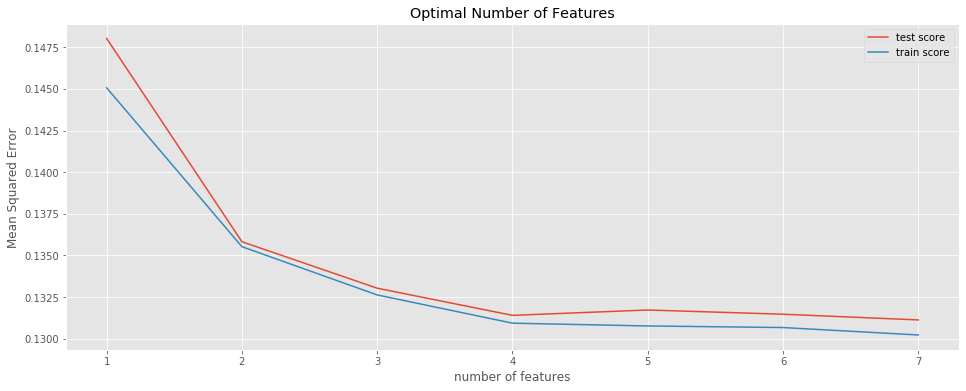

In [546]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], abs(cv_results["mean_test_score"]))
plt.plot(cv_results["param_n_features_to_select"], abs(cv_results["mean_train_score"])) 
plt.xlabel('number of features')
plt.ylabel('Mean Squared Error')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')
plt.show()

In [547]:
CV_2 = KFold(n_splits=20, shuffle=True)
lm3 = LinearRegression()
rfe_2 = RFE(lm3, n_features_to_select=4)
rfe_2 = rfe_2.fit(X_train, y_train)
list(zip(X_train.columns,rfe_2.support_,rfe_2.ranking_))

[('id', False, 7),
 ('accommodates', True, 1),
 ('bathrooms', True, 1),
 ('number_of_reviews', False, 6),
 ('review_scores_rating', True, 1),
 ('bedrooms', True, 1),
 ('beds', False, 3),
 ('host_response_rate', False, 4),
 ('cleaning_fee', False, 5),
 ('host_has_profile_pic', False, 2)]

In [548]:
scores_4 = abs(cross_val_score(rfe_2, X, y, scoring='neg_mean_squared_error', cv= CV_2, n_jobs = -1))

In [549]:
print("Minimum MSE:", round(scores_4.min(),4))
print("Maximum MSE:", round(scores_4.max(),4))
print("Mean MSE:", round(scores_4.mean(),4))

Minimum MSE: 0.0992
Maximum MSE: 0.1575
Mean MSE: 0.1278


In [550]:
y_pred = rfe_2.predict(LA_airbnb_test)
y_pred = pd.DataFrame(y_pred, columns=['Log2_price'])
y_pred['Log2_price'] = round(y_pred['Log2_price'],2)

In [551]:
final_df = LA_airbnb_test_2[['accommodates','bathrooms','review_scores_rating','bedrooms','host_has_profile_pic']]
final_df.reset_index(inplace=True)
final_df.drop('index', axis = 1, inplace=True)

C:\Users\ranih\anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [552]:
dfs = [final_df, y_pred]
final_df = pd.concat(dfs, axis = 1)
final_df['real_price'] = round(2 ** final_df['Log2_price'] + 100,2)
final_df.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,host_has_profile_pic,Log2_price,real_price
0,1.0,1.0,0.94,0.0,1,4.50,122.63
1,6.0,2.0,1.00,2.0,1,5.33,140.22
2,1.0,1.0,0.96,0.0,1,4.51,122.78
3,4.0,2.0,0.96,2.0,1,5.22,137.27
4,2.0,2.0,0.98,1.0,1,4.95,130.91


In [556]:
print("Mean MSE 3 Feature model:", round(scores_3.mean(),5))
print("Mean MSE 4 Feature model:", round(scores_4.mean(),5))

Mean MSE 3 Feature model: 0.12977
Mean MSE 4 Feature model: 0.12782
